# ЛР 2

# Статестический ряд. Построение гистограмм равноинтервальным и равновероятностным методами.

In [1]:
from random import uniform
from tabulate import tabulate
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

## Вариационный ряд

In [2]:
def Y(x):
    return 2 / (2 + x)

A = -1
B = 5
n = 100
X = sorted(round(uniform(0, 1) * (B - A) + A, 4) for _ in range(n))
x_list = sorted([round(Y(X[i]), 3) for i in range(n)])
print(x_list)

[0.288, 0.289, 0.289, 0.29, 0.291, 0.294, 0.3, 0.314, 0.315, 0.315, 0.321, 0.328, 0.329, 0.335, 0.345, 0.349, 0.349, 0.36, 0.362, 0.364, 0.365, 0.366, 0.371, 0.378, 0.386, 0.394, 0.401, 0.404, 0.412, 0.416, 0.417, 0.421, 0.435, 0.443, 0.449, 0.45, 0.45, 0.451, 0.453, 0.466, 0.469, 0.502, 0.513, 0.552, 0.555, 0.562, 0.584, 0.592, 0.594, 0.595, 0.599, 0.613, 0.619, 0.619, 0.624, 0.669, 0.672, 0.672, 0.681, 0.697, 0.711, 0.712, 0.73, 0.733, 0.739, 0.741, 0.76, 0.764, 0.764, 0.789, 0.799, 0.841, 0.87, 0.882, 0.898, 0.915, 0.926, 0.927, 0.96, 0.97, 0.978, 1.091, 1.151, 1.162, 1.178, 1.216, 1.217, 1.223, 1.225, 1.231, 1.297, 1.46, 1.471, 1.499, 1.648, 1.763, 1.858, 1.861, 1.879, 1.929]


## Задание 1

### Равноинтервальный метод

In [3]:
m = int(np.sqrt(n))
m

10

Шаг

In [4]:
h = (max(x_list) - min(x_list)) / m
h

0.1641

In [5]:
a = [round(x_list[i] + i * h, 4) for i in range(m + 1)]
a

[0.288,
 0.4531,
 0.6172,
 0.7823,
 0.9474,
 1.1145,
 1.2846,
 1.4627,
 1.6278,
 1.7919,
 1.962]

In [6]:
intervals = [(a, b) for (a, b) in zip(a, a[1:])]
intervals

[(0.288, 0.4531),
 (0.4531, 0.6172),
 (0.6172, 0.7823),
 (0.7823, 0.9474),
 (0.9474, 1.1145),
 (1.1145, 1.2846),
 (1.2846, 1.4627),
 (1.4627, 1.6278),
 (1.6278, 1.7919),
 (1.7919, 1.962)]

In [7]:
v = []
for interval in intervals:
    left_bound, right_bound = interval
    count = 0
    for i in x_list:
        if left_bound <= i <= right_bound:
            count += 1
    v.append(count)
v

[39, 13, 17, 9, 4, 8, 2, 2, 2, 4]

In [8]:
f_star = [i / (h * n) for i in v]
f_star

[2.376599634369287,
 0.7921998781230957,
 1.035953686776356,
 0.5484460694698354,
 0.2437538086532602,
 0.4875076173065204,
 0.1218769043266301,
 0.1218769043266301,
 0.1218769043266301,
 0.2437538086532602]

In [9]:
w = [round(i / n, 4) for i in v]
wi = [0]
for k, i in enumerate(w):
    wi.append(round(wi[k] + i, 4))
print(w)
print(wi)

[0.39, 0.13, 0.17, 0.09, 0.04, 0.08, 0.02, 0.02, 0.02, 0.04]
[0, 0.39, 0.52, 0.69, 0.78, 0.82, 0.9, 0.92, 0.94, 0.96, 1.0]


### Таблица

In [10]:
table = [list(item) for item in zip(intervals, f_star, v, w, wi[1:])]
print(tabulate(table, headers=['Интервал', 'Значение функции', 'Количество вариант', 'Частота', 'Накопленная частота'], tablefmt='fancy_grid'))

╒══════════════════╤════════════════════╤══════════════════════╤═══════════╤═══════════════════════╕
│ Интервал         │   Значение функции │   Количество вариант │   Частота │   Накопленная частота │
╞══════════════════╪════════════════════╪══════════════════════╪═══════════╪═══════════════════════╡
│ (0.288, 0.4531)  │           2.3766   │                   39 │      0.39 │                  0.39 │
├──────────────────┼────────────────────┼──────────────────────┼───────────┼───────────────────────┤
│ (0.4531, 0.6172) │           0.7922   │                   13 │      0.13 │                  0.52 │
├──────────────────┼────────────────────┼──────────────────────┼───────────┼───────────────────────┤
│ (0.6172, 0.7823) │           1.03595  │                   17 │      0.17 │                  0.69 │
├──────────────────┼────────────────────┼──────────────────────┼───────────┼───────────────────────┤
│ (0.7823, 0.9474) │           0.548446 │                    9 │      0.09 │               

### Гистограмма

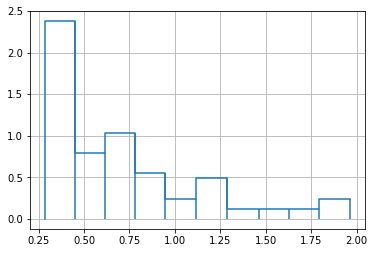

In [11]:
x_plot = a[:]
y_plot = f_star[:]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
plt.grid(True)
plt.show()

### Полигон распредления

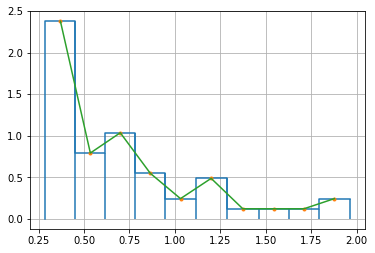

In [12]:
x_plot = a[:]
y_plot = f_star[:]
x_middles = [(i + j) / 2 for (i, j) in intervals]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
plt.plot(x_middles, y_plot[1:], '.')
plt.plot(x_middles, y_plot[1:])
plt.grid(True)
plt.show()

### Эмпирическая функция распредления

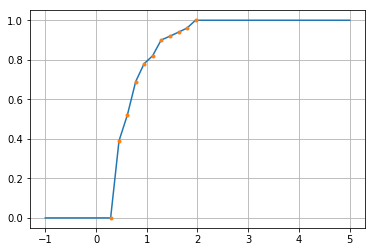

In [13]:
y_plot = wi[:]
x_plot = a[:]
x_plot.insert(0, A)
y_plot.insert(0, 0)
x_plot.append(B)
y_plot.append(1)
plt.plot(x_plot, y_plot)
plt.plot(x_plot[1:-1], y_plot[1:-1], '.')
plt.grid(True)
plt.show()

### Теоретическая плотность распредления

In [14]:
def f(x):
    if A <= x <= B:
        return 1 / (B - A)
    else:
        return 0

def g(y):
    return f(2 / y - 2) * (2 / y**2) 

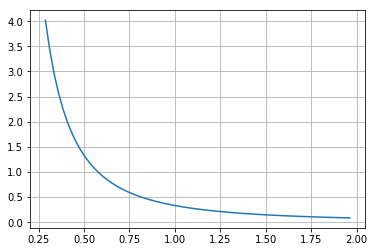

In [15]:
x_lin = np.linspace(min(a[:]), max(a[:]), 70)
plt.plot(x_lin, list(map(g, x_lin)))
plt.grid(True)
plt.show()

### График теоретической и эмпирической плотностей распределения

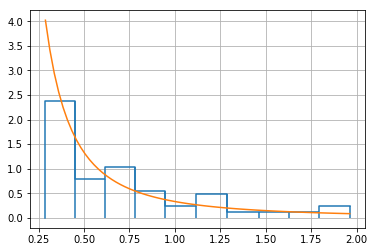

In [16]:
x_plot = a[:]
y_plot = f_star[:]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
x_lin = np.linspace(min(x_plot), max(x_plot), 70)
plt.plot(x_lin, list(map(g, x_lin)))
plt.grid(True)
plt.show()

## Задание 2

### Равновероятностный метод

In [17]:
m = int(np.sqrt(n))
m

10

Количество вариант в интервале

In [18]:
v = n // m
v

10

In [19]:
a = []
b = []
i = 0
for _ in range(m):
    a.append(x_list[i])
    b.append(x_list[i + v - 1])
    i += v
intervals = [(i, j) for (i, j) in zip(a, b)]
intervals

[(0.288, 0.315),
 (0.321, 0.364),
 (0.365, 0.416),
 (0.417, 0.466),
 (0.469, 0.595),
 (0.599, 0.697),
 (0.711, 0.789),
 (0.799, 0.97),
 (0.978, 1.231),
 (1.297, 1.929)]

In [20]:
h = [j - i for (i, j) in zip(a, b)]
h

[0.027000000000000024,
 0.04299999999999998,
 0.05099999999999999,
 0.049000000000000044,
 0.126,
 0.09799999999999998,
 0.07800000000000007,
 0.17099999999999993,
 0.2530000000000001,
 0.6320000000000001]

In [21]:
f_star = [v / (n * i) for i in h]
f_star

[3.7037037037037006,
 2.3255813953488382,
 1.9607843137254908,
 2.0408163265306105,
 0.7936507936507937,
 1.0204081632653064,
 1.2820512820512808,
 0.5847953216374271,
 0.39525691699604726,
 0.1582278481012658]

In [22]:
wi = [0]
for i in range(m):
    wi.append(round(wi[i] + v / n, 4))
wi

[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

### Таблица

In [23]:
table = [list(item) for item in zip(intervals, f_star, h, wi[1:])]
print(tabulate(table, headers=['Интервал', 'Значение функции', 'Шаг', 
                               'Накопленная частота'], tablefmt='fancy_grid'))

╒════════════════╤════════════════════╤═══════╤═══════════════════════╕
│ Интервал       │   Значение функции │   Шаг │   Накопленная частота │
╞════════════════╪════════════════════╪═══════╪═══════════════════════╡
│ (0.288, 0.315) │           3.7037   │ 0.027 │                   0.1 │
├────────────────┼────────────────────┼───────┼───────────────────────┤
│ (0.321, 0.364) │           2.32558  │ 0.043 │                   0.2 │
├────────────────┼────────────────────┼───────┼───────────────────────┤
│ (0.365, 0.416) │           1.96078  │ 0.051 │                   0.3 │
├────────────────┼────────────────────┼───────┼───────────────────────┤
│ (0.417, 0.466) │           2.04082  │ 0.049 │                   0.4 │
├────────────────┼────────────────────┼───────┼───────────────────────┤
│ (0.469, 0.595) │           0.793651 │ 0.126 │                   0.5 │
├────────────────┼────────────────────┼───────┼───────────────────────┤
│ (0.599, 0.697) │           1.02041  │ 0.098 │                 

### Гистограмма

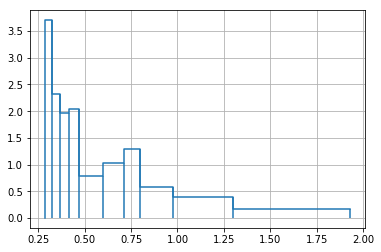

In [24]:
x_plot = a[:]
x_plot.append(b[-1])
y_plot = f_star[:]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
plt.grid(True)
plt.show()

### Полигон распределения

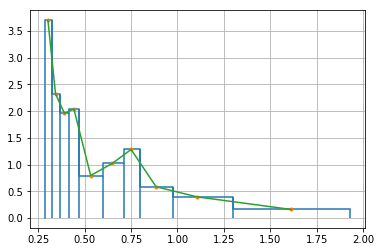

In [25]:
x_plot = a[:]
x_plot.append(b[-1])
y_plot = f_star[:]
x_middles = [(i + j) / 2 for (i, j) in intervals]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
plt.plot(x_middles, y_plot[1:], '.')
plt.plot(x_middles, y_plot[1:])
plt.grid(True)
plt.show()

### Эмпирическая функция распределения

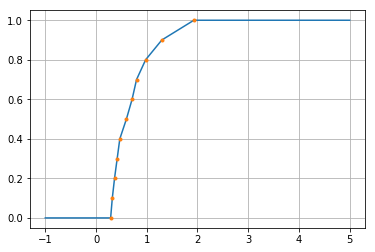

In [26]:
y_plot = wi[:]
x_plot = a[:]
x_plot.append(b[-1])
x_plot.insert(0, A)
y_plot.insert(0, 0)
x_plot.append(B)
y_plot.append(1)
plt.plot(x_plot, y_plot)
plt.plot(x_plot[1:-1], y_plot[1:-1], '.')
plt.grid(True)
plt.show()

### График теоретической и эмпирической плотностей распределения

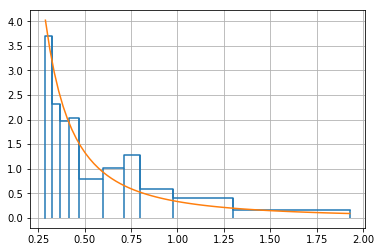

In [27]:
x_plot = a[:]
x_plot.append(b[-1])
y_plot = f_star[:]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
x_lin = np.linspace(min(a[:]), max(b[:]), 70)
plt.plot(x_lin, list(map(g, x_lin)))
plt.grid(True)
plt.show()